<a href="https://colab.research.google.com/github/jplavorr/Data-Science/blob/main/Analisando_os_Crimes_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Projeto do Curso: Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

#Análise dos Crimes do Rio de Janeiro





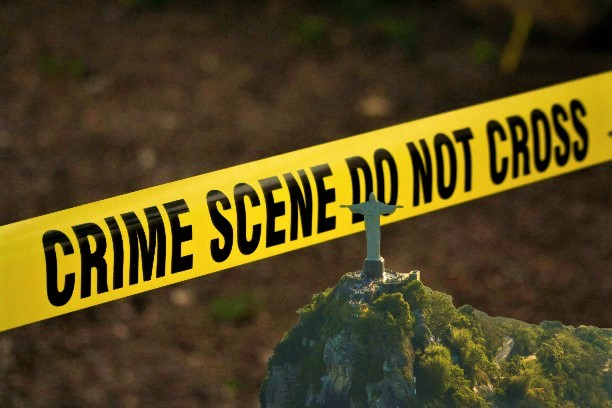





O Rio de Janeiro é um dos principais centros econômicos, culturais e financeiros do país, sendo internacionalmente conhecida por diversos ícones culturais e paisagísticos, como o Pão de Açúcar, o morro do Corcovado com a estátua do Cristo Redentor, as praias, entre outras. Mas nem tudo são flores, Rio de Janeiro é conhecido pelo seu alto indice de crimes, aonde todos os dias podemos ver noticias sobre os crimes que assolam essa cidade. A violencia no Rio não se trata de um problema recente, pois já vem sendo palco de muitos filmes como *Cidade de Deus (2002)*, *Tropa de Elite(2007)*, entre outros. 





Vamos pegar os dados disponibilizados pelo Instituto de Segurança Pública do Rio de Janeiro. No projeto deste Módulo, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas, para tentar entender como à violência se comportou nos últimos anos.

## Obtenção dos Dados

Os dados foram obtidos diretamento do portal [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html), que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Este arquivo csv foi pré-processado minimamente pelo professor Carlos Melo , para focar nos pontos aprendidos neste Módulo. No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

###Importando Dados

In [238]:
#Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [112]:
#Definindo arquivo
df_rio = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

Na documentação oficial disponibilizada no site, não consta o significado de cada varável. Então, iremos fazer a descrição baseado no código.

###Dicionário das Variáveis



*   `vano` - Ano em que a ocorrência foi comunicada.
*   `mes` - Mes em que a ocorrência foi comunicada.
*   `hom_doloso` - Homicídio doloso.
*   `lesao_corp_morte` - Lesão corporal resultando em morte.
*   `latrocinio` - Latrocinio.
*   `hom_por_interv_policial` - Homicídio resultado pela intervenção do agente do estado.
*   `tentat_hom` - Tentativa de Homicídio.
*   `lesao_corp_dolosa` - Lesão corporal Dolosa.
*   `estupro` - Estupro.
*   `hom_culposo` - Homicídio Culposo.
*   `lesao_corp_culposa` - Lesão corporal Culposa.
*   `roubo_comercio` - Roubo em Comércios.
*   `roubo_residencia` - Roubo em Residência.
*   `roubo_veiculo` - Roubo de Veículo.
*   `roubo_carga` - Roubo de Carga.
*   `roubo_transeunte` - Roubo à transeunte.
*   `roubo_em_coletivo` - Roubo em Coletivo.
*   `roubo_banco` - Roubo à Banco.
*   `roubo_cx_eletronico` - Roubo à Caixa Eletônico.
*   `roubo_celular` - Roubo de Celular.
*   `roubo_conducao_saque` - Roubo com condução da vítima para efetuar o saque. 
*   `roubo_apos_saque` - Roubo após o saque da vítima.
*   `roubo_bicicleta` - Roubo de Bicicleta.
*   `outros_roubos` - Outros Roubos.
*   `total_roubos` - Nº Total de Roubos.
*   `furto_veiculos` Furto à Veículos.
*   `furto_transeunte` - Furto à Transeunte.
*   `furto_coletivo` - Furto à Coletivo.
*   `furto_celular` - Furto de Celular.
*   `furto_bicicleta` -  Furto Bicicleta.
*   `outros_furtos` - Outros Furtos.
*   `total_furtos` - Nº Total de Furtos.
*   `sequestro` - Sequestro.
*   `extorsao` - Extorsão.
*   `sequestro_relampago` -  Sequestro Relâmpago.
*   `estelionato` - Estelionato.
*   `apreensao_drogas` - Apreensão de Drogas.
*   `posse_drogas` - Posse de Drogas.
*   `trafico_drogas` -  Tráfico de Drogas.
*   `apreensao_drogas_sem_autor` - Apreensão de Drogas sem Autor.
*   `recuperacao_veiculos` - Recuperação de Veiculos.
*   `apf` - Auto de Prisão em Flagrante.
*   `aaapai` - Auto de Apreensão de Adolescente por Prática de Ato Infracional.
*   `cmp` - Cumprimento de Mandado de Prisão.
*   `cmba` - Cumprimento de Mandado de Busca e Apreensão.
*   `ameaca` - Ameaça.
*   `pessoas_desaparecidas` - Pessoas Desaparecidas.
*   `encontro_cadaver` - Encontro de Cadáver.
*   `encontro_ossada` -  Encontro de Ossada.
*   `pol_militares_mortos_serv` - Policiais Militares Mortos em Serviço.
*   `pol_civil_mortos_serv`- Polícias Civis Mortos em Serviço.
*   `indicador_letalidade` - Indicador de Letalidade. 
*   `indicador_roubo_rua` - Indicador de Roubo na Rua.
*   `indicador_roubo_veic` - Indicador de Roubo à Veículos.
*   `registro_ocorrencias` - Registro de Ocorrências.
*   `fase` - $\begin{cases}
    2:\ \, \textrm{Consolidado sem errata} \\
    3: \ \, \textrm{Consolidado com errata} 
   \end{cases} $




Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

In [113]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df_rio.shape[1], "\n"
      'Entradas: ', df_rio.shape[0])

#Visualizando as 5 primeiras entradas
df_rio.head()


Dimensões do Dataset 
Variáveis:  56 
Entradas:  344


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Agora que já sabemos com a dimensão dos dados com que estamos lidando, vamos verificar que tipo de dados nós temos, verificando as variáveis existentes no nosso conjunto de dados.

Esse tipo de informação é bastante útil, e nos ajudará a direcionar nosso trabalho na fase de limpeza dos dados.

In [114]:
# ver os tipos das variáveis
df_rio.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Aqui é interessante notar que todas as variáveis presentes no dataset são do tipo numérico, sejam elas `int` ou `float`.



###Dados Ausentes

A cultura de armazenar e ter um cuidado com o tratamento dos dados ainda não é algo muito presente no Brasil, principalmente se tratando de um banco de dados público. Portanto é interessante procurar saber a partir de qual ano esses dados começaram a ser coletados, pois isso pode ter uma grande influência na presença de *outliers*.

In [115]:
#Analisando o inicio da coleta dos dados
print(df_rio['vano'].unique())
print('\nQuanto anos tem desde o inicio da coleta:', len(df_rio['vano'].unique()))

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]

Quanto anos tem desde o inicio da coleta: 29


Quando aplicamos o `df_rio.head()`, podemos ver que alguns dados apresentam valores `NaN` (valores ausentes). Isso pode ser dado o grande intervalo de tempo apresentado no dataset, podemos sugerir algumas hipóteses do que poderia explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados na época. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais.

*  Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção deles em relação à totalidade do dataset.


In [116]:
#Verificando a porcentagem de dados ausentes
(df_rio.isnull().sum() / df_rio.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Aqui podemos ver que temos colunas com quase todos os dados ausentes. Nesse caso, acredito que os dados não começaram a ser registrados até uma determinada data, e após isso, a coleta foi feita de forma efetiva. Iremos verificar os dados ausentes de cada coluna por ano, para tentar verificar essa teoria.

In [117]:
# Porcentagem de dados ausentes por ano
df_rio.set_index('vano').isnull().sum(level=0) / df_rio.shape[0]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1992,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1993,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1994,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1995,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1996,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1997,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1998,0.0,0.0,0.034884,0.0,0.000000,0.0,0.0,0.034884,0.000000,0.034884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.034884,0.034884,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1999,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034884,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034884,0.034884,0.

###Limpeza dos Dados

Podemos ver que existe um mau preenchimento de algumas colunas antes dos anos 2005. Além disso, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de crimes relacionados a bicicletas e apreensão de drogas. 

Uma ideia que iremos explorar para esse conjunto de dados, é começar a analisar os dados à partir de quando eles começaram a ser catalogados. Vamos diminuir nosso DataFrame para 15 anos e avaliar como está a proporção de variáveis NaNs.

In [118]:
#Retirando alguns anos do DataFrame
df_rio_clean = df_rio.drop(df_rio[df_rio.vano < 2005].index, axis=0)

Antes de observar como a proporção de valores ausentes, vamos olhar quantas informações perdemos nessa limpeza.

In [119]:
#Observando o número de entradas e variáveis antes e depois da limpeza
print('Antes da limpeza o Dataframe possui {} entradas e {} variáveis\n'.format(df_rio.shape[0],df_rio.shape[1]))
print('Após a limpeza o Dataframe possui {} entradas e {} variáveis'.format(df_rio_clean.shape[0],df_rio_clean.shape[1]))

Antes da limpeza o Dataframe possui 344 entradas e 56 variáveis

Após a limpeza o Dataframe possui 176 entradas e 56 variáveis


Agora que reduzimos o DataDrame, vamos verificar a nova porcentangem de valores nulos.

In [120]:
#Verificando quantidade de valores nulos
(df_rio_clean.isnull().sum()/ df_rio_clean.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.613636
furto_bicicleta               0.613636
cmba                          0.068182
posse_drogas                  0.068182
trafico_drogas                0.068182
apf                           0.068182
aaapai                        0.068182
cmp                           0.068182
apreensao_drogas_sem_autor    0.068182
estupro                       0.000000
roubo_veiculo                 0.000000
roubo_apos_saque              0.000000
roubo_conducao_saque          0.000000
roubo_celular                 0.000000
roubo_cx_eletronico           0.000000
mes                           0.000000
roubo_banco                   0.000000
roubo_em_coletivo             0.000000
roubo_transeunte              0.000000
roubo_carga                   0.000000
roubo_residencia              0.000000
hom_culposo                   0.000000
roubo_comercio                0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.000000
outros_roubos            

Como pudemos ver acima, temos um conjunto de dados com uma porcentagem de valores nulos muito pequena, agora podemos fazer uma análise mais concreta sobre esses dados. Apenas com exceção dos crimes relacionados a bicicleta, mas iremos averiguar isso posteriormente. 

### Informações Estatísticas da Violência no Rio de Janeiro

Usando o método `describe()`, podemos visualizar as informações estatísticas presente no nosso DataSet. Com essa informação, podemos ver como os dados estão distribuídos, se há algum outlier presente em alguma coluna e até mesmo identificar alguma falha na distribuição dos dados.

In [121]:
#Visualizando informações estatísticas
df_rio_clean.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,68.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,68.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,164.000000,164.000000,164.000000,176.000000,164.000000,164.000000,164.000000,164.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2011.840909,6.409091,429.857955,3.681818,15.051136,79.278409,414.647727,6392.778409,389.176136,193.210227,3249.903409,478.102273,119.437500,2728.045455,456.880682,5562.892045,826.198864,2.352273,3.880682,969.937500,10.107955,133.375000,10.808824,1372.670455,12668.056818,1531.664773,2289.738636,724.960227,1550.875000,124.808824,7502.011364,13647.471591,0.579545,140.818182,8.454545,2403.823864,1485.812500,609.237805,759.146341,186.146341,2047.647727,2319.585366,568.628049,1255.512195,83.042683,5822.715909,442.659091,47.028409,3.085227,1.840909,0.346591,527.869318,7359.028409,2728.045455,59484.704545,2.988636
std,4.249064,3.443043,81.428161,2.135659,5.590062,37.202716,89.634628,946.668572,83.142203,36.759856,624.554604,106.970548,22.953283,908.304315,242.247813,1504.654153,317.777335,1.677003,2.590636,665.748714,5.090579,45.953595,7.767628,604.265083,3810.359330,218.598251,770.367727,184.333405,256.968228,80.247427,915.910894,1752.035616,0.922377,38.817241,4.975159,654.450983,553.176876,246.307700,312.871487,36.221243,565.201467,650.520866,248.040620,357.035450,62.951374,1011.199536,67.719233,16.451636,2.148384,1.510999,0.649650,102.170054,2308.738687,908.304315,7077.222526,0.106295
min,2005.000000,1.000000,272.000000,0.000000,5.000000,15.000000,268.000000,2521.000000,222.000000,111.000000,848.000000,277.000000,49.000000,1413.000000,170.000000,2260.000000,345.000000,0.000000,0.000000,301.000000,1.000000,11.000000,0.000000,782.000000,7740.000000,1159.000000,663.000000,167.000000,527.000000,0.000000,3089.000000,5795.000000,0.000000,49.000000,0.000000,717.000000,688.000000,248.000000,262.000000,114.000000,1219.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,16.000000,0.000000,0.000000,0.000000,334.000000,3298.000000,1413.000000,31231.000000,2.000000
25%,2008.000000,3.000000,368.000000,2.000000,11.000000,49.000000,339.500000,5705.000000,327.750000,163.000000,2864.750000,396.000000,103.750000,2061.250000,269.000000,4531.500000,607.250000,1.000000,2.000000,545.250000,6.000000,94.000000,2.250000,928.500000,9877.000000,1356.250000,1756.250000,623.000000,1370.000000,3.750000,7166.250000,12704.750000,0.000000,120.750000,5.000000,1859.500000,937.500000,360.500000,426.000000,160.000000,1645.250000,1681.000000,332.500000,950.500000,46.000000,5073.250000,394.500000,36.750000,2.000000,1.000000,0.000000,445.750000,5634.250000,2061.250000,54439.000000,3.000000
50%,2012.000000,6.000000,421.000000,3.000000,14.500000,75.500000,393.000000,6381.000000,402.000000,187.500000,3319.000000,441.000000,119.00

A função `describe()` nos fornece valores estatísticos sobre cada coluna do DataFrame, entre elas, estão à média (**mean**), o valor max (**max**) e o valor minímo (**min**). Esses valores nos ajudam a ter ideia de como os valores estão distribuídos. Em uma primeira análise não se nota nada muito fora do padrão, mas iremos fazer análises exploratória em alguns valores especificos.  

### Crimes Contra o Patrimônio - Veículos

Nessa seção, iremos nos dedicar a um problema bastante recorrente nas grandes metrópoles brasileiras e por conta disso iremos dar um destaque a esse tipo de crime. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [122]:
#Média de roubo de veiculos
mean_roubo_veic = df_rio_clean['roubo_veiculo'].mean()
print('Media de roubos por mes:',round(mean_roubo_veic))

#Média de furtos de veiculos
mean_furtos_veic = df_rio_clean['furto_veiculos'].mean()
print('\nMedia de furtos por mes:',round(mean_furtos_veic))

# ver a média de recuperacao_veiculos
mean_recuperacao_veic = df_rio_clean['recuperacao_veiculos'].mean()
print('\nMedia de recuperacoes por mes:',round(mean_recuperacao_veic))


Media de roubos por mes: 2728

Media de furtos por mes: 1532

Media de recuperacoes por mes: 2048


Partindo dessa análise, vemos que:

* Podemos ver que a cidade do Rio de Janeiro, tem em média, 2728 roubos de veículos por mês.

* Em relação aos furtos, média é menor, mas ainda é um número bem alarmante, foram registrados em média 1532 furtos por mês.

* Em média, 2048 veículos foram recuperados por mês.

Vamos agora tentar descobrir quantos veículos são recuperados em meio ao número total de veículos perdidos.

In [123]:
# total de veículos perdidos
total = mean_roubo_veic + mean_furtos_veic
print('Média de Veículos Perdidos por Mês: {:.2f}'.format(total))

# porcentagem de veículos recuperados
pct = mean_recuperacao_veic/total*100

# ver a média de recuperacao_veiculos
mean_recuperacao_veic = df_rio_clean['recuperacao_veiculos'].mean()
print('\nMedia de recuperacoes por mes:',round(mean_recuperacao_veic))

print('\n{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4259.71

Media de recuperacoes por mes: 2048

48.07% dos veículos roubados ou furtados são recuperados.


Podemos ver acima, que em média $48.07 \%$ dos veículos perdidos por mês são recuperados. Não é uma estimativa muito boa, mas podemos dizer que em média, metade dos veículos perdidos por mês são recuperados pela polícia. 

Será que veículos roubados são mais propensos a serem recuperados do que veículos furtados? Vamos plotar uma mapa de correlação, para tentar ver se tem algum indicador dessa dúvida.

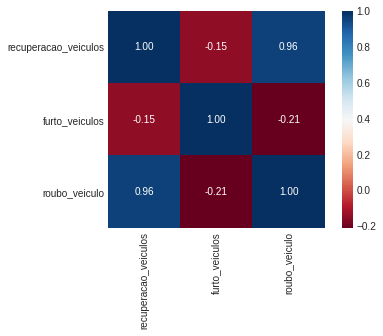

In [124]:
corr_veic = df_rio_clean[['recuperacao_veiculos', 'furto_veiculos', 'roubo_veiculo']].corr()
sns.heatmap(corr_veic,cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Podemos ver que existe uma correlação muito forte entre as variáveis `roubo_veiculo` e `recuperacao_veiculos`. Isso pode ser um indicador de que é mais provável um carro ser recuperado se o crime for de roubo.

Vamos observar como se comportou a taxa de recuperação ao longo dos anos, para termos uma noção se a recuperação de veículos aumentou ou diminuiu com o passar dos anos.

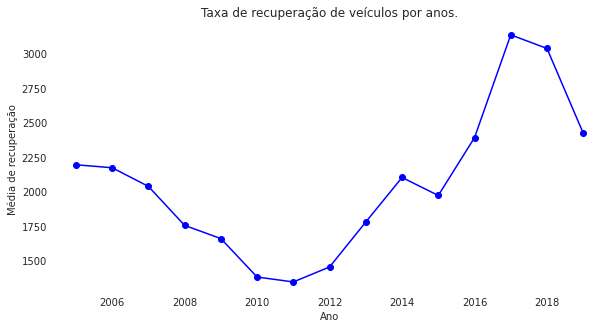

In [133]:
df_rio_clean.groupby(['vano'])['recuperacao_veiculos'].mean().plot(figsize=(10,5),color='blue', marker='o')
plt.xlabel('Ano')
plt.ylabel('Média de recuperação')
plt.title('Taxa de recuperação de veículos por anos.');

Podemos que desde 2010, a taxa de recuperação de veículos só vem aumentando, apesar de ter uma queda em 2018.

###Crimes contra vida

Dos crimes presentes nos dados, com certeza os mais graves são os que resultam na perda da vida do cidadão. Vamos nessa seção, analisar esses crimes em específico e ver como eles se comportaram durante os anos.

Dentre esses crimes, temos: 
* `lesao_corp_morte` - Lesão corporal que resultou em morte.
* `latrocinio` - Roubo seguido de morte.
* `hom_doloso`  -  Quando se tem intenção de matar.
* `hom_culposo` - Quando não se tem intenção de matar.

Além dessas variáveis, temos também `hom_por_interv_policial`, `pol_civis_mortos_serv` e `pol_militares_mortos_serv`, mas iremos analisar eles separadamente posteriormente.



In [127]:
#Especificando o DataFrame
df_rio_morte = df_rio_clean[['vano','mes','lesao_corp_morte','latrocinio','hom_doloso','hom_culposo']]
df_rio_morte.describe()

,vano,mes,lesao_corp_morte,latrocinio,hom_doloso,hom_culposo
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2011.840909,6.409091,3.681818,15.051136,429.857955,193.210227
std,4.249064,3.443043,2.135659,5.590062,81.428161,36.759856
min,2005.000000,1.000000,0.000000,5.000000,272.000000,111.000000
25%,2008.000000,3.000000,2.000000,11.000000,368.000000,163.000000
50%,2012.000000,6.000000,3.000000,14.500000,421.000000,187.500000
75%,2015.250000,9.000000,5.000000,18.000000,483.000000,220.000000
max,2019.000000,12.000000,10.000000,30.000000,682.000000,299.000000


Podemos ver que os casos de *Homicídio Doloso* dominam as estatísticas de mortes, vamos ver detalhadamente como ela se comportou ao longo dos anos.

In [128]:
# valores max e min de hom_doloso
max_hom_doloso = df_rio_clean.hom_doloso.max()
min_hom_doloso = df_rio_clean.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	682


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos. 

Em relação ao mês com números mais elevado, houveram 682 homicídios dolosos.

Vamos investigar um pouco mais a fundo essas entradas.

In [129]:
# verificando o mês com menor número de homicídios dolosos
df_rio_clean[df_rio_clean.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [130]:
# verificando o mês com maior número de homicídios dolosos
df_rio_clean[df_rio_clean.hom_doloso == 682]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
170,2005,3,682,2.0,26,94.0,345,6749,317.0,249.0,3034.0,464,167,3056,442,2876,811,1,11.0,553.0,19.0,174.0,NaN,1621,10195,1811,943,340.0,1291.0,NaN,6613,10998,0.0,235.0,5.0,1277.0,1011,NaN,NaN,NaN,2459,NaN,NaN,NaN,NaN,5885.0,423.0,86,7.0,4.0,1.0,804,4240,3056,50182.0,3


Acima, vemos que o mês de Março de 2005 foi o mês com mais casos de homicídios dollosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi Junho de 2015.

Isso sugere um bom sinal, indicando que, talvez, o crime venha diminuindo. Iremos fazer uma análise mais aprofundada pode nos dizer, se de fato, o número de homicídios dolosos vem diminuindo.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


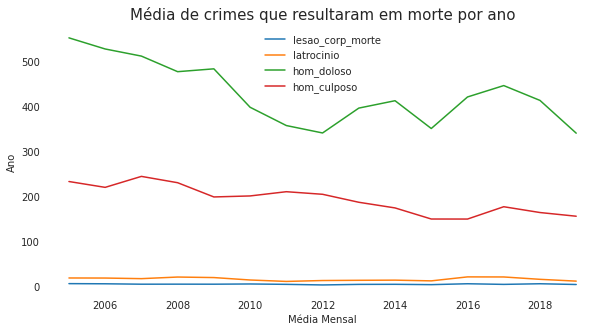

In [134]:
#Plotando o comportamento desses crimes ao longo dos anos.
df_rio_morte.groupby(['vano'])['lesao_corp_morte','latrocinio','hom_doloso','hom_culposo'].mean().plot(figsize =(10,5))
plt.title('Média de crimes que resultaram em morte por ano',fontsize=15)
plt.xlabel('Média Mensal')
plt.ylabel('Ano')
plt.show();

Vemos nesse gráfico, que desde o ano de 2005 houve sim uma diminuição no número de homicídios dolosos, mas por volta de 2012, ele se mantem oscilando em média de 400 mortes mensais, o que não é algo gratificante. 

###Crimes contra Políciais.

Ser polícial é uma profissão extremamente perigosa e são esses profissionais que estão encargo de atender essas ocorrências. Nesse dataset, temos duas colunas relacionadas a políciais, são elas:

 * `pol_militares_mortos_serv` - Políciais Militares mortos em serviço.
 * `pol_civis_mortos_serv` - Políciais Civis mortos em serviço.

In [145]:
df_rio_policia = df_rio_clean[['vano','mes', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']]
df_rio_policia.head()

,vano,mes,pol_militares_mortos_serv,pol_civis_mortos_serv
168,2005,1,1.0,0.0
169,2005,2,3.0,1.0
170,2005,3,4.0,1.0
171,2005,4,3.0,1.0
172,2005,5,1.0,2.0


Quais desses orgãos políciais tiveram mais baixas ao decorrer dos anos?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


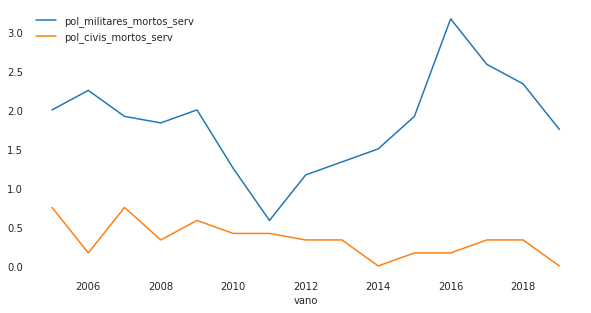

In [146]:
#Gráfico de mortes de policiais
df_rio_policia.groupby(['vano'])['pol_militares_mortos_serv', 'pol_civis_mortos_serv'].mean().plot(figsize=(10,5));

Nesse gráfico, podemos notar algumas coisas:

* O número de mortes por políciais militares é maior do que políciais civis. Isso pode ser dado ao fato que é a polícia militar que normalmente atende os chamados de emergência ou até mesmo a visibilidade nas rondas que é feita pelos bairros.

* Em 2016 teve um aumento grande na morte de polícais militares. Aonde podemos achar muitas matérias falando em específico sobre esse ano. Como [Mortes causadas por policiais crescem 25,8% em 2016](https://agenciabrasil.ebc.com.br/geral/noticia/2017-10/mortes-causadas-por-policiais-crescem-258-em-2016#:~:text=As%20mortes%20causadas%20por%20policiais,e%20civis%20no%20ano%20passado.).



#Crimes de Furtos e Roubos.

Todos que moram numa grande metrópole provavelmente já tiveram o desprazer de serem furtados ou assaltados. Nosso dataset está repleto de eventos como esses e iremos analisar eles para tentar entender quais são os roubos/furtos mais frequêntes. 

In [285]:
# Dataframe para roubos
df_rio_roubos = df_rio_clean[['vano','mes','roubo_apos_saque','roubo_banco',
                  'roubo_bicicleta','roubo_carga','roubo_celular',
                  'roubo_comercio','roubo_conducao_saque','roubo_cx_eletronico','roubo_em_coletivo',
                  'roubo_residencia','roubo_transeunte','roubo_veiculo','outros_roubos','total_roubos']]
df_rio_roubos.head()

,vano,mes,roubo_apos_saque,roubo_banco,roubo_bicicleta,roubo_carga,roubo_celular,roubo_comercio,roubo_conducao_saque,roubo_cx_eletronico,roubo_em_coletivo,roubo_residencia,roubo_transeunte,roubo_veiculo,outros_roubos,total_roubos
168,2005,1,166.0,1,NaN,402,441.0,428,25.0,4.0,650,155,2424,2747,1304,8747
169,2005,2,156.0,6,NaN,421,410.0,434,19.0,4.0,614,147,2537,2610,1345,8703
170,2005,3,174.0,1,NaN,442,553.0,464,19.0,11.0,811,167,2876,3056,1621,10195
171,2005,4,159.0,3,NaN,357,589.0,438,20.0,2.0,852,133,2701,3051,1599,9904
172,2005,5,164.0,1,NaN,359,624.0,465,25.0,3.0,892,149,3026,2999,1557,10264


In [286]:
#Dataframe para furtos
df_rio_furtos = df_rio_clean[['vano','mes','furto_bicicleta','furto_celular','furto_coletivo',
                   'furto_transeunte','furto_veiculos','outros_furtos','total_furtos']]
df_rio_furtos.head()

,vano,mes,furto_bicicleta,furto_celular,furto_coletivo,furto_transeunte,furto_veiculos,outros_furtos,total_furtos
168,2005,1,NaN,1074.0,282.0,991,1749,6784,10880
169,2005,2,NaN,989.0,275.0,1107,1521,6341,10233
170,2005,3,NaN,1291.0,340.0,943,1811,6613,10998
171,2005,4,NaN,1188.0,348.0,914,1767,6183,10400
172,2005,5,NaN,1228.0,386.0,1026,1927,6332,10899


De cara, já podemos notar que as colunas relacionadas a bicicleta permanecem com muitos valores ausentes. Mas isso pode ser devido a um mau preenchimento dos dados, então iremos deixar assim para não correr o risco de prejudicar a análise.

###Roubo em Coletivos
Transporte público é algo muito usado nas grandes metrópoles brasileiras. Será que os passageiros estão seguros?
Vamos averiguar como é o comportamento dessa variável com o passar dos anos.

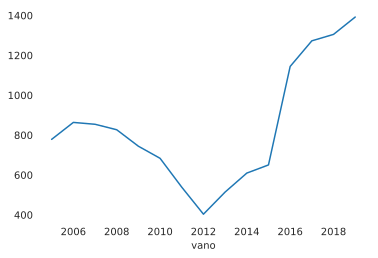

In [290]:
df_rio_clean.groupby(['vano'])['roubo_em_coletivo'].mean().plot();

A resposta não poderia ser mais alarmante, à partir de 2012 tivemos um aumento muito grande nos roubos à coletivos. Esse é um problema muito preocupante, pois a maioria dos brasileiros usa o transporte público como principal meio de transporte no seu dia a dia. 

Vemos também que os crimes relacionados a furto, possuem uma variável semelhante com o roubo, vamos analisar elas em conjunto e ver como se comportam.

In [280]:
#Criando um DataFrame apenas contendo os roubos semelhantes
df_rio_roubos = df_rio_clean[['roubo_bicicleta','roubo_celular','roubo_em_coletivo',
                  'roubo_transeunte','roubo_veiculo','outros_roubos']]

#Criando um DataFrame apenas contendo os furtos semelhantes
df_rio_furtos = df_rio_clean[['furto_bicicleta','furto_celular','furto_coletivo','furto_transeunte',
                   'furto_veiculos','outros_furtos']]

print((df_rio_roubos.sum() / df_rio_clean.total_roubos.sum()).sort_values(),'\n')

print((df_rio_furtos.sum() / df_rio_clean.total_furtos.sum()).sort_values())


roubo_bicicleta      0.000330
roubo_em_coletivo    0.065219
roubo_celular        0.076566
outros_roubos        0.108357
roubo_veiculo        0.215348
roubo_transeunte     0.439127
dtype: float64 

furto_bicicleta     0.003533
furto_coletivo      0.053120
furto_veiculos      0.112231
furto_celular       0.113638
furto_transeunte    0.167777
outros_furtos       0.549700
dtype: float64


Vamos agora agrupar esses valores em ordem para agruparmos corretamente o nosso gráfico.

In [281]:
#Criando a ordem dos crimes
labels = [ 'Transeunte', 'Celular','Bicicleta','Veículos','Coletivo', 'Outros']
x = np.arange(len(labels))

#Agrupando as variaveis de roubo na ordem labels
var1 = [0.439127, 0.076566, 0.000330, 0.215348, 0.065219,0.108357]

#Agrupando as variaveis de furto na ordem labels
var2 = [0.167777,0.113638, 0.003533, 0.112231, 0.053120, 0.549700]

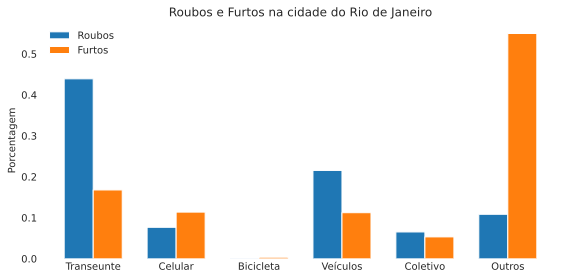

In [282]:
# criar uma figura para grafico de barras
fig, ax = plt.subplots(figsize=(8, 4))

# plotar Roubos e Furtos saparadamente
rects1 = ax.bar(x - 0.35/2, var1, 0.35, label='Roubos')
rects2 = ax.bar(x + 0.35/2, var2, 0.35, label='Furtos')

# labels do eixo
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Porcentagem')

# título
ax.set_title('Roubos e Furtos na cidade do Rio de Janeiro')

# legenda
ax.legend()



# plotar gráfico
fig.tight_layout()
plt.show()

Podemos ver, que à roubos a pedestres é o mais frequente dentro os roubos, representando 40% dos casos de roubo. Em relação aos furtos, vemos que existe um mau preenchimento dos dados, pois à variável `outros_furtos` representa mais de 50% dos furtos. 

Vamos fazer um plot histórico, para saber se o crime contra pedestres vem diminuindo com o passar dos anos.

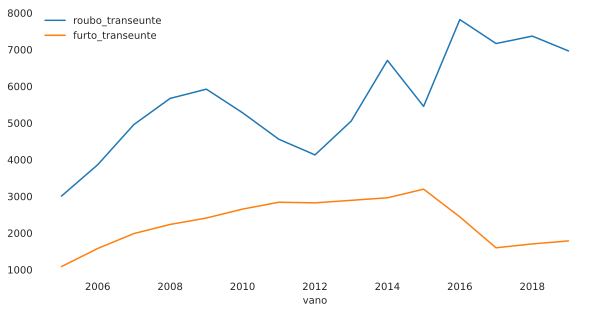

In [297]:
df_rio_clean.groupby(['vano'])[['roubo_transeunte', 'furto_transeunte']].mean().plot(figsize = (10,5));

### Roubos e Furtos Totais

Vamos analisar todos os dados de roubos e furtos com o passar dos anos, para ter noção de qual crime foi mais reportado durante os anos.

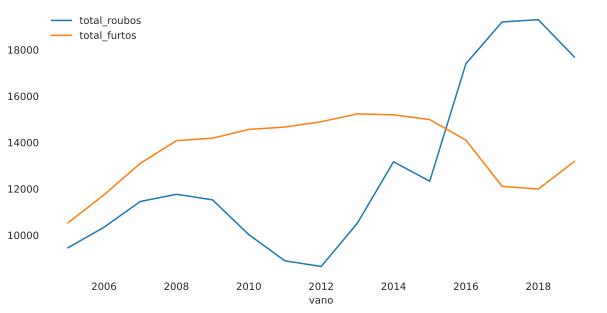

In [294]:
df_rio_clean.groupby(['vano'])[[ 'total_roubos','total_furtos']].mean().plot(figsize = (10,5));

Vemos que até 2015 tivemos um número de furtos maior do que o número de roubos. Além disso, o comportamento da variável furto é bem comportada, tendo um leve desnível em 2016. Já a variável roubo, teve uma crescente muito grande à partir de 2012. O que é algo a se surpreender, pois se espera que com o passar dos anos sejam feitas medidas para que se combata o aumento desse crime. 

#Conclusão

Quando se trata de dados públicos precisamos ter muito cuidado como nomeamos as variáveis, muitas vezes o significado de cada variável não é informado pelo orgão que montou os dados. 

Também precisamos ter muito cuidado como abordamos a limpeza dos dados, pois cada caso pode precisar de uma tática diferente.

Com essa análise, vemos que não foi feito muito para o aprimoramento da segurança pública, pois crimes como roubos em transportes públicos, roubos à transeuntes e até mesmo o número total de roubos só fez aumentar com o passar do tempo. Uma alternativa para prefeitura seria monitorar em quais bairros/ruas estão ocorrendo o maior índices de crimes durante o ano e aumentar a ronda policial nesses locais nos devidos meses e alertar a população sobre quais rotas estão mais seguras.
